In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('mnist.npz')

print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [3]:
array = data['x_test']
print(f"Kích thước: {array.shape}")
print(f"Kiểu dữ liệu: {array.dtype}")
print(f"Giá trị mẫu: {array[0]}")

Kích thước: (10000, 28, 28)
Kiểu dữ liệu: uint8
Giá trị mẫu: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 

In [4]:
array = data['x_train']
print(f"Kích thước: {array.shape}")
print(f"Kiểu dữ liệu: {array.dtype}")
print(f"Giá trị mẫu: {array[0]}")

Kích thước: (60000, 28, 28)
Kiểu dữ liệu: uint8
Giá trị mẫu: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [ 

In [5]:
array = data['y_train']
print(f"Kích thước: {array.shape}")
print(f"Kiểu dữ liệu: {array.dtype}")
print(f"Giá trị mẫu: {array[0]}")

Kích thước: (60000,)
Kiểu dữ liệu: uint8
Giá trị mẫu: 5


In [6]:
array = data['y_test']
print(f"Kích thước: {array.shape}")
print(f"Kiểu dữ liệu: {array.dtype}")
print(f"Giá trị mẫu: {array[0]}")

Kích thước: (10000,)
Kiểu dữ liệu: uint8
Giá trị mẫu: 7


In [7]:
import numpy as np

data = np.load('mnist.npz')
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

x_train = x_train / 255.0
x_test = x_test / 255.0

def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01  
    b1 = np.zeros((hidden_size, 1))  # Bias lớp ẩn
    W2 = np.random.randn(output_size, hidden_size) * 0.01  
    b2 = np.zeros((output_size, 1))  
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def compute_loss(AL, Y):
    m = Y.shape[1]
    logprobs = np.log(AL + 1e-8) 
    loss = -np.sum(Y * logprobs) / m
    return loss

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A1, A2

def backward_propagation(X, Y, A1, A2, W1, W2):
    m = X.shape[1]

    dZ2 = A2 - Y  
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(A1)  
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def one_hot_encode(y, num_classes=10):
    m = y.shape[0]
    one_hot = np.zeros((num_classes, m))
    one_hot[y, np.arange(m)] = 1
    return one_hot

loss_history = []

def train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    global loss_history
    loss_history = []  
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    Y_train_one_hot = one_hot_encode(Y_train)

    for epoch in range(epochs):
        A1, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = compute_loss(A2, Y_train_one_hot)
        loss_history.append(loss) 
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train_one_hot, A1, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return W1, b1, W2, b2

def plot_loss():
    plt.figure(figsize=(8, 6))
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_model(X_test, Y_test, W1, b1, W2, b2):
    A1, A2 = forward_propagation(X_test, W1, b1, W2, b2)
    predicted_classes = np.argmax(A2, axis=0)
    accuracy = np.mean(predicted_classes == Y_test) * 100
    print(f'Accuracy on test set: {accuracy:.2f}%')

In [8]:
# Khởi tạo các tham số
input_size = 28 * 28  # 784 pixel trong mỗi ảnh 28x28
hidden_size = 128  # Số nút trong lớp ẩn
output_size = 10  # 10 chữ số từ 0 đến 9
epochs = 500
learning_rate = 0.1

# Chuẩn bị dữ liệu
X_train = x_train.reshape(-1, 28 * 28).T  # Chuyển dữ liệu thành vector 1D cho mỗi ảnh
X_test = x_test.reshape(-1, 28 * 28).T
Y_train = y_train
Y_test = y_test

# Huấn luyện mô hình
W1, b1, W2, b2 = train_neural_network(X_train, Y_train, input_size, hidden_size, output_size, epochs, learning_rate)

# Đánh giá mô hình
evaluate_model(X_test, Y_test, W1, b1, W2, b2)

Epoch 0, Loss: 2.303144523166878
Epoch 50, Loss: 1.9789382380452136
Epoch 100, Loss: 0.937840014468521
Epoch 150, Loss: 0.6244555663222721
Epoch 200, Loss: 0.5073963187830696
Epoch 250, Loss: 0.4463844876196765
Epoch 300, Loss: 0.4090630040686258
Epoch 350, Loss: 0.3839013393541496
Epoch 400, Loss: 0.36559862942582155
Epoch 450, Loss: 0.3514716581460989
Accuracy on test set: 90.72%


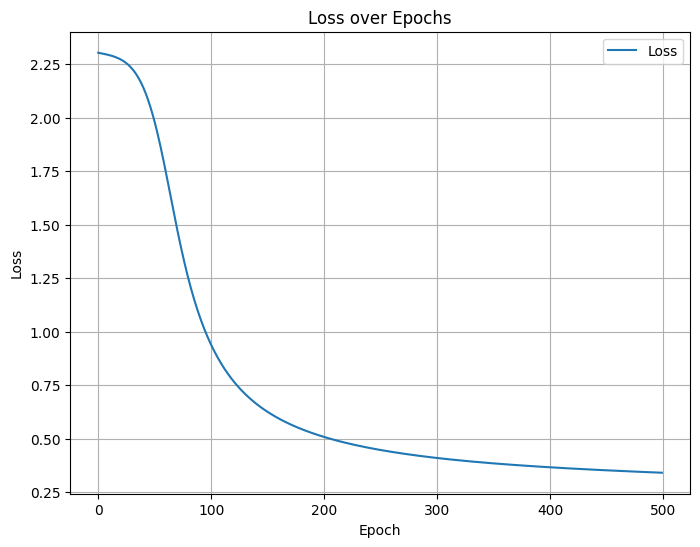

In [9]:
# Vẽ đồ thị loss
plot_loss()